<a href="https://colab.research.google.com/github/SirisPudasai/ML/blob/main/Sales_Profitability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving ecommerce_sales_data.csv to ecommerce_sales_data (1).csv


{'ecommerce_sales_data (1).csv': b'Order Date,Product Name,Category,Region,Quantity,Sales,Profit\n2024-12-31,Printer,Office,North,4,3640,348.93\n2022-11-27,Mouse,Accessories,East,7,1197,106.53\n2022-05-11,Tablet,Electronics,South,5,5865,502.73\n2024-03-16,Mouse,Accessories,South,2,786,202.87\n2022-09-10,Mouse,Accessories,West,1,509,103.28\n2023-12-01,Camera,Electronics,West,1,524,106.35\n2023-10-09,Headphones,Accessories,North,7,6167,1027.98\n2022-01-14,Camera,Electronics,South,7,3059,873.5\n2022-04-02,Smartwatch,Electronics,East,9,5526,595.28\n2024-10-22,Printer,Office,South,8,672,186.37\n2023-12-04,Monitor,Accessories,South,6,7074,1357.68\n2022-09-27,Smartwatch,Electronics,East,2,502,137.4\n2023-12-21,Tablet,Electronics,North,7,7462,2166.17\n2024-02-03,Smartphone,Electronics,West,5,4205,585.29\n2023-10-10,Camera,Electronics,West,1,570,138.54\n2022-10-16,Headphones,Accessories,East,1,441,102.42\n2022-05-15,Mouse,Accessories,North,7,7469,589.81\n2023-02-11,Tablet,Electronics,South,2,22

In [ ]:
df = pd.read_csv("ecommerce_sales_data.csv")
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [ ]:
df

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28
...,...,...,...,...,...,...,...
3495,2023-02-15,Monitor,Accessories,North,4,4064,771.16
3496,2022-09-18,Monitor,Accessories,East,1,1117,119.89
3497,2022-04-12,Laptop,Electronics,South,4,260,66.02
3498,2022-01-18,Printer,Office,South,3,222,50.28


Data Processing

In [ ]:

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature Engineering: extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Drop Order Date as we have extracted info
df = df.drop('Order Date', axis=1)

# Handle missing values (if any)
df = df.fillna(0)

# Separate features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
# Encode categorical variables
#ML models cannot understand words, so we need to convert them into numbers.
categorical_cols = ['Product Name', 'Category', 'Region']


In [ ]:

encoder = OneHotEncoder(drop='first', sparse_output=False)

X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add encoded
X = X.drop(categorical_cols, axis=1)

X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Feature scaling (optional but helps regression)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1754854.76
R-squared: 0.72


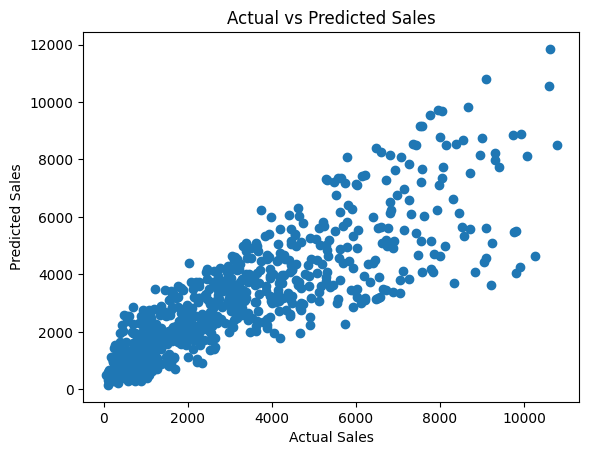

In [ ]:
#Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [ ]:
# Step 1: Install joblib
!pip install joblib

# Step 2: Save model
import joblib

# Save Linear Regression model
joblib.dump(model, 'sales_model.pkl')

# Save the scaler and encoder as well (needed for new data)
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

# Step 3: Download files to your system (Colab)
from google.colab import files
files.download('sales_model.pkl')
files.download('scaler.pkl')
files.download('encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = joblib.load('sales_model.pkl')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoder.pkl')

#  new data
new_data = pd.DataFrame([
    {
        'Order Date': '2026-01-20',
        'Product Name': 'Mouse',
        'Category': 'Accessories',
        'Region': 'North',
        'Quantity': 5,
        'Profit': 120.5
    },
    {
        'Order Date': '2026-01-21',
        'Product Name': 'Printer',
        'Category': 'Office',
        'Region': 'East',
        'Quantity': 3,
        'Profit': 350
    }
])

#  Preprocess new data
new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])
new_data['Year'] = new_data['Order Date'].dt.year
new_data['Month'] = new_data['Order Date'].dt.month
new_data = new_data.drop('Order Date', axis=1)

# Separate features
X_new = new_data.copy()
categorical_cols = ['Product Name', 'Category', 'Region']

# Encode categorical variables using saved encoder
X_encoded = pd.DataFrame(encoder.transform(X_new[categorical_cols]),
                         columns=encoder.get_feature_names_out(categorical_cols))

X_new = X_new.drop(categorical_cols, axis=1)
X_new = pd.concat([X_new.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Scale features using saved scaler
X_scaled_new = pd.DataFrame(scaler.transform(X_new), columns=X_new.columns)

# Predict
predictions = model.predict(X_scaled_new)

# Show results
new_data['Predicted_Sales'] = predictions
print(new_data)



  Product Name     Category Region  Quantity  Profit  Year  Month  \
0        Mouse  Accessories  North         5   120.5  2026      1   
1      Printer       Office   East         3   350.0  2026      1   

   Predicted_Sales  
0      1854.431481  
1      2136.075798  
